In [1]:
import mysql.connector as conn
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="ec2-3-9-191-104.eu-west-2.compute.amazonaws.com",
    port="5432",
    database="testdb",
    user="consultants",
    password="WelcomeItc@2022"
)

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

sql_query = "SELECT * FROM accountstable"
accounts_data = pd.read_sql_query(sql_query, conn)
accounts_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_18148\2105696124.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accounts_data = pd.read_sql_query(sql_query, conn)


,Account_ID,Customer_ID,Account_Type,Balance,Open_Date,Last_Activity_Date,Credit_Card,Churn
0,458433,1000,current,6633.93,2019-08-31,2024-03-20,No,No
1,458434,1001,savings,4469.22,2017-05-07,2024-03-19,Yes,Yes
2,458435,1002,current,9489.27,2014-12-08,2024-03-20,Yes,No
3,458436,1003,current,7453.59,2020-11-04,2024-03-24,No,No
4,458437,1004,current,6429.12,2024-01-20,2024-03-24,Yes,Yes


In [2]:
sql_query = "SELECT * FROM customerstable"
customers_data = pd.read_sql_query(sql_query, conn)
customers_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_18148\4096748895.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_data = pd.read_sql_query(sql_query, conn)


,Customer_ID,Name,Age,Address,Postcode,Phone_Number,Email,Credit_Score,Tenure,Country,Gender,Products_number,Employment_Status,Estimated_Salary
0,1018,Charles Padilla,40,06203 Smith Station,81599,8935852844,remain5039@gmail.com,627,10,Germany,Female,4,Selfemployed,49448.42
1,1011,Taylor Wright,48,747 Rebecca Dale,82459,8107498233,past3754@gmail.com,812,1,Spain,Female,2,Selfemployed,30297.09
2,1005,Bruce Ruiz,43,99195 Roberts Flat,44439,7771471859,along554@gmail.com,673,10,France,Female,4,Employed,173646.25
3,1000,William Phillips,30,81914 Rodriguez Turnpike Suite 957,8357,9234968025,sit4822@gmail.com,485,5,Germany,Male,3,Selfemployed,194879.16
4,1013,Gene Bush,27,13186 Rasmussen Union,14528,8923665178,value2985@gmail.com,470,10,Spain,Male,4,Employed,188489.52


In [3]:
sql_query = "SELECT * FROM transactionstable"
transactions_data = pd.read_sql_query(sql_query, conn)
transactions_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_18148\3140948064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_data = pd.read_sql_query(sql_query, conn)


,Transaction_ID,Account_ID,Transaction_Type,Amount,Transaction_Date
0,297741,458433,Withdrawal,9156.67,2024-03-20
1,196383,458434,onlinepayment,4148.86,2024-03-19
2,931278,458435,Deposit,9713.08,2024-03-20
3,734359,458436,Withdrawal,6560.60,2024-03-24
4,182353,458437,Withdrawal,2403.40,2024-03-24


In [4]:
merged_df = pd.merge(accounts_data, customers_data, on='Customer_ID', how='inner')

# Now, join the result with df3 on the 'key' column
churn_data = pd.merge(merged_df, transactions_data, on='Account_ID', how='inner')
churn_data.replace({"Yes":1, "No":0}, inplace = True)


In [5]:
churn_data

,Account_ID,Customer_ID,Account_Type,Balance,Open_Date,Last_Activity_Date,Credit_Card,Churn,Name,Age,...,Tenure,Country,Gender,Products_number,Employment_Status,Estimated_Salary,Transaction_ID,Transaction_Type,Amount,Transaction_Date
0,458433,1000,current,6633.93,2019-08-31,2024-03-20,0,0,William Phillips,30,...,5,Germany,Male,3,Selfemployed,194879.16,297741,Withdrawal,9156.67,2024-03-20
1,458434,1001,savings,4469.22,2017-05-07,2024-03-19,1,1,Cynthia Gonzalez,40,...,7,France,Female,5,Selfemployed,70876.55,196383,onlinepayment,4148.86,2024-03-19
2,458435,1002,current,9489.27,2014-12-08,2024-03-20,1,0,Shannon Richards,23,...,10,Germany,Male,5,Unemployed,0.00,931278,Deposit,9713.08,2024-03-20
3,458436,1003,current,7453.59,2020-11-04,2024-03-24,0,0,Scott Johnson,48,...,4,France,Female,4,Unknown,151534.40,734359,Withdrawal,6560.60,2024-03-24
4,458437,1004,current,6429.12,2024-01-20,2024-03-24,1,1,Tommy Shepherd,26,...,0,Germany,Male,1,Selfemployed,105913.02,182353,Withdrawal,2403.40,2024-03-24
5,458438,1005,current,7601.15,2014-08-25,2024-03-19,0,0,Bruce Ruiz,43,...,10,France,Female,4,Employed,173646.25,527091,onlinepayment,7786.47,2024-03-19
6,458439,1006,current,206.70,2024-02-13,2023-03-24,0,0,Stephanie Castro,28,...,0,Germany,Male,2,Unknown,87872.90,748462,onlinepayment,6643.16,2023-03-24
7,458440,1007,savings,2964.55,2019-03-12,2024-03-19,0,0,Angela Huynh,48,...,5,France,Male,1,Employed,155785.72,501590,Deposit,4956.06,2024-03-19
8,458441,1008,current,7429.76,2024-01-27,2024-03-24,1,0,Mary Taylor,79,...,0,Spain,Male,5,Retired,84400.85,778726,onlinepayment,8089.13,2024-03-24
9,458442,1009,savings,0.00,2020-12-02,2023-12-10,0,1,Cindy Mcmahon,81,...,4,France,Male,5,Retired,144969.80,885604,Withdrawal,3940.87,2023-12-10


In [6]:
churn_data.dtypes


Account_ID              int64
Customer_ID             int64
Account_Type           object
Balance               float64
Open_Date              object
Last_Activity_Date     object
Credit_Card             int64
Churn                   int64
Name                   object
Age                     int64
Address                object
Postcode               object
Phone_Number           object
Email                  object
Credit_Score            int64
Tenure                  int64
Country                object
Gender                 object
Products_number         int64
Employment_Status      object
Estimated_Salary      float64
Transaction_ID          int64
Transaction_Type       object
Amount                float64
Transaction_Date       object
dtype: object

In [7]:
churn_data['Transaction_Date'] = pd.to_datetime(churn_data['Transaction_Date'], format = "%d/%m/%Y")
churn_data['Last_Activity_Date'] = pd.to_datetime(churn_data['Last_Activity_Date'], format = "%d/%m/%Y")
churn_data['Open_Date'] = pd.to_datetime(churn_data['Open_Date'], format = "%d/%m/%Y")


In [8]:
churn_data.dtypes

Account_ID                     int64
Customer_ID                    int64
Account_Type                  object
Balance                      float64
Open_Date             datetime64[ns]
Last_Activity_Date    datetime64[ns]
Credit_Card                    int64
Churn                          int64
Name                          object
Age                            int64
Address                       object
Postcode                      object
Phone_Number                  object
Email                         object
Credit_Score                   int64
Tenure                         int64
Country                       object
Gender                        object
Products_number                int64
Employment_Status             object
Estimated_Salary             float64
Transaction_ID                 int64
Transaction_Type              object
Amount                       float64
Transaction_Date      datetime64[ns]
dtype: object

C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Credit_Score', ylabel='Count'>

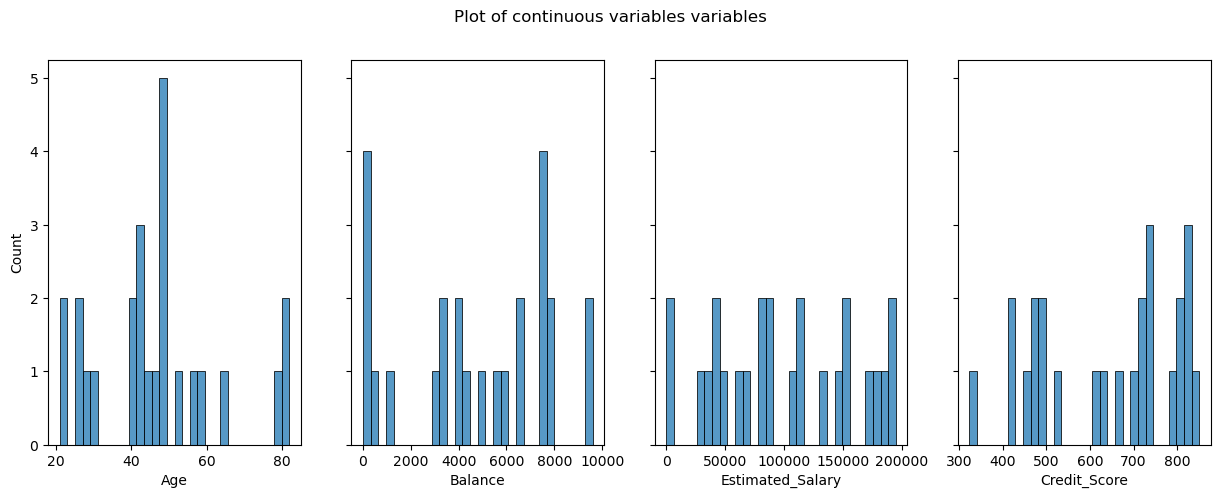

In [9]:
# Visualize in subplots the distribution of the variables
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Plot of continuous variables variables')

# Histogram of continuous variables
sns.histplot(ax=axes[0], data = churn_data, x = "Age", bins = 30)
sns.histplot(ax=axes[1], data = churn_data, x = "Balance", bins = 30)
sns.histplot(ax=axes[2], data = churn_data, x = "Estimated_Salary", bins = 30)
sns.histplot(ax=axes[3], data = churn_data, x = "Credit_Score", bins = 30)

<Axes: xlabel='Gender', ylabel='count'>

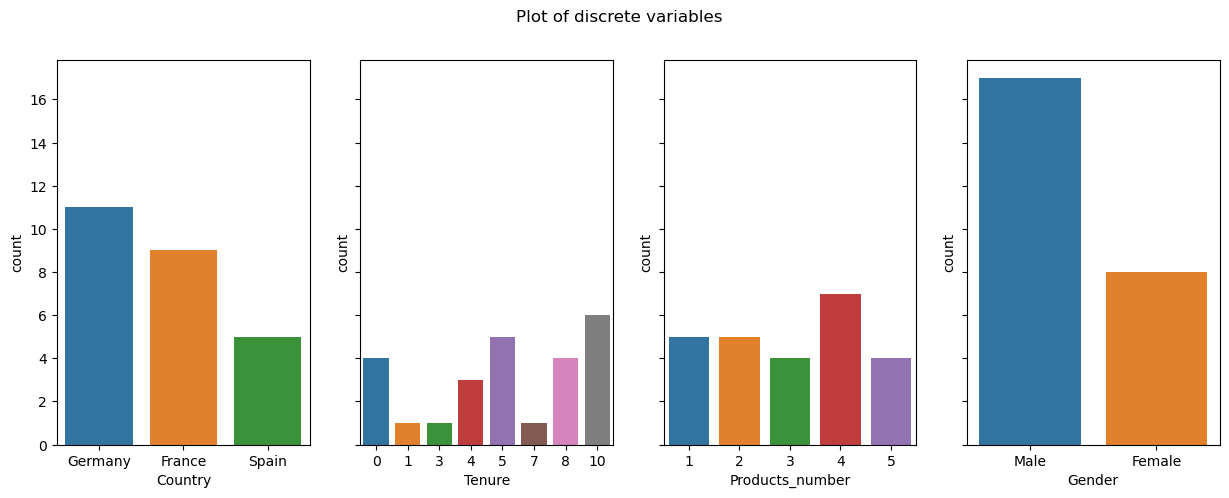

In [12]:
fig2, axes2 = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig2.suptitle('Plot of discrete variables')
# Countplots of other variables
sns.countplot(ax=axes2[0], data = churn_data, x = "Country")
sns.countplot(ax=axes2[1], data = churn_data, x = "Tenure")
sns.countplot(ax=axes2[2], data = churn_data, x = "Products_number")
sns.countplot(ax=axes2[3], data = churn_data, x = "Gender")


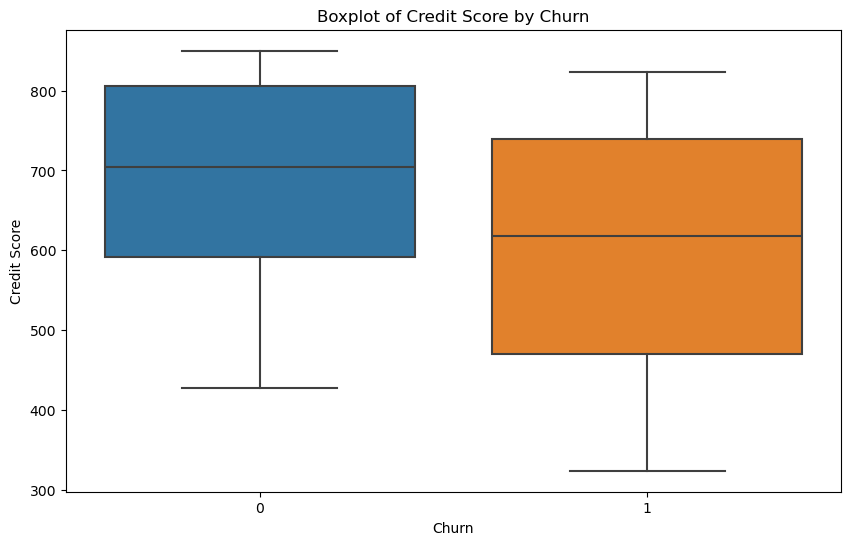

In [13]:
# Boxplot of Credit Score by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Credit_Score', data=churn_data)
plt.title('Boxplot of Credit Score by Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

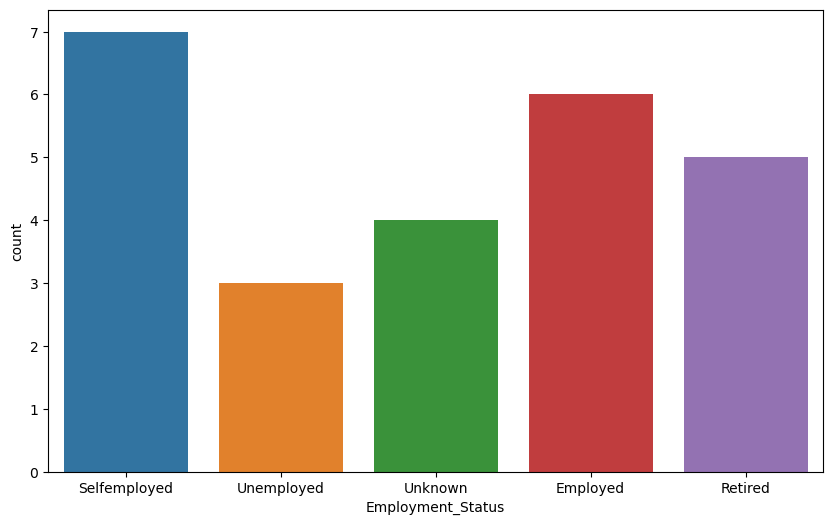

,Churn
Employment_Status,
Employed,0.666667
Retired,0.600000
Selfemployed,0.571429
Unemployed,0.333333
Unknown,0.250000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x="Employment_Status", data=churn_data)
plt.show()

churn_data[['Employment_Status','Churn']].groupby(['Employment_Status']).mean()
